Binary Bandit - Assignment 7

In [2]:
import random
import matplotlib.pyplot as plt
random.seed(0)
class BinaryBandit(object):
  p = [0]*2
  def __init__(self, p1, p2):
    self.N = 2
    self.p[0] = p1
    self.p[1] = p2
  def actions(self):
    result = []
    for i in range(0,self.N):
      result.append(i)
    return result
  def reward(self, action):
    rand = random.random()
    if rand < self.p[action]:
      return 1
    else:
      return 0


In [3]:
def Greedy_binary(myBandit, epsilon, max_iteration):
  Q = [0]*myBandit.N
  count = [0]*myBandit.N
  r = 0
  R = []
  R_avg = [0]*1
  for iter in range(1,max_iteration+1):
    if random.random() > epsilon:
      action = Q.index(max(Q))
    else:
      action = random.choice(myBandit.actions())
    r = myBandit.reward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])/count[action]
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    if iter == max_iteration:
      print("Counts for move 1:", count[0])
      print("Counts for move 2:", count[1])
      actionTaken = ["1", "2"]
      plt.bar(actionTaken, count)
      plt.title("Times each action is taken")
      plt.xlabel("Action")
      plt.ylabel("Count")
      plt.show()

  return Q, R_avg, R

Counts for move 1: 119
Counts for move 2: 1881


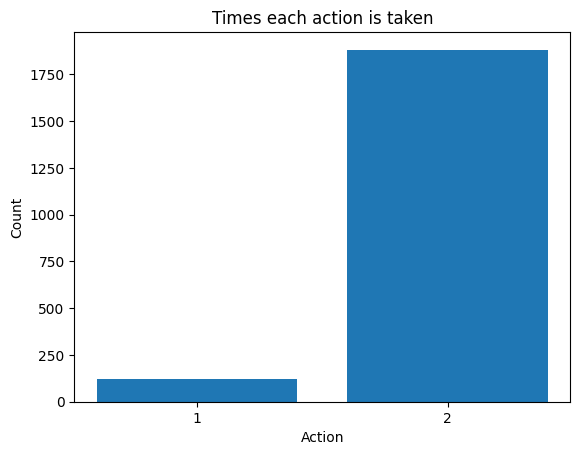

Results for Bandit A
Observed Average Reward over 2000 experiments for action 1: 0.08403361344537812
Observed Average Reward over 2000 experiments for action 2: 0.20520999468367906
Actual Reward for action 1: 0.1
Actual Reward for action 2: 0.2


In [4]:
random.seed(5)
myBanditA = BinaryBandit(0.1, 0.2)
Q, R_avg, R = Greedy_binary(myBanditA, 0.1, 2000)
print("Results for Bandit A")

print("Observed Average Reward over 2000 experiments for action 1:", Q[0])
print("Observed Average Reward over 2000 experiments for action 2:", Q[1])
print("Actual Reward for action 1:",myBanditA.p[0])
print("Actual Reward for action 2:",myBanditA.p[1])

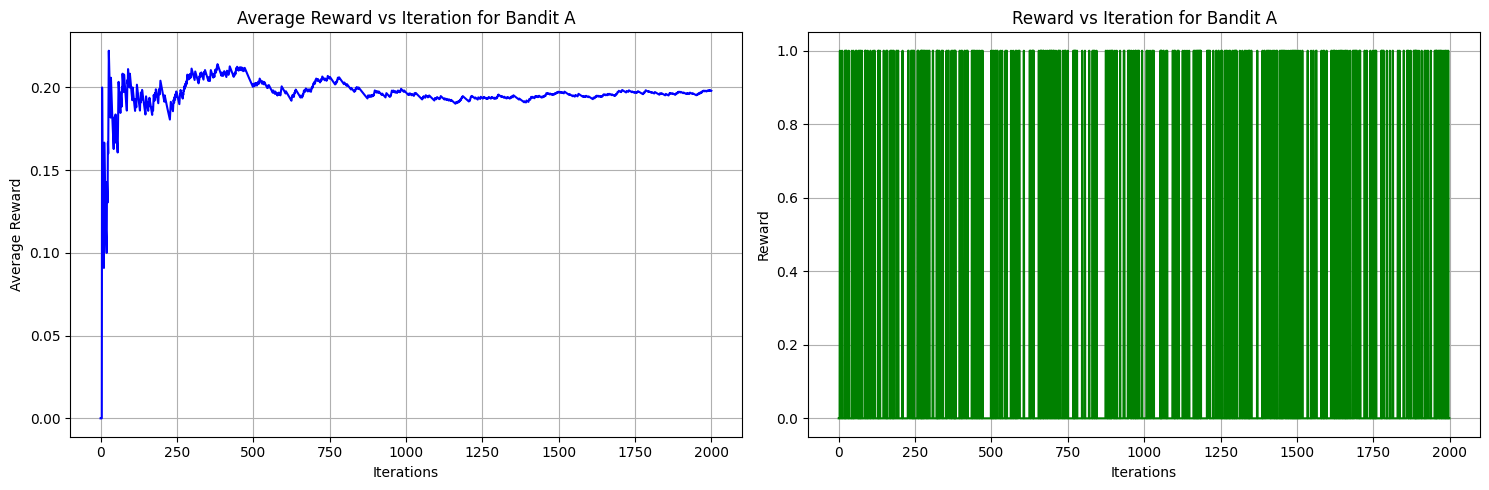

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg, color='blue')
ax1.title.set_text("Average Reward vs Iteration for Bandit A")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Average Reward")
ax1.grid(True)
ax2.plot(R, color='green')
ax2.title.set_text("Reward vs Iteration for Bandit A")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Reward")
ax2.grid(True)
plt.tight_layout()
plt.show()


Counts for move 1: 113
Counts for move 2: 1887


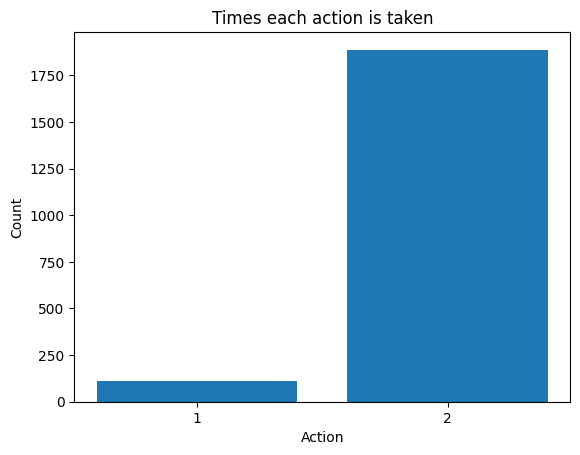


RESULTS FOR BANDIT B
Observed Average Reward over 2000 experiments for action 1: 0.8230
Observed Average Reward over 2000 experiments for action 2: 0.9051
------------------------------------------------------------------------------------------
Actual Reward for action 1: 0.8000
Actual Reward for action 2: 0.9000
******************************************************************************************


In [6]:
random.seed(9)
myBanditB = BinaryBandit(0.8, 0.9)
Q, R_avg, R = Greedy_binary(myBanditB, 0.1, 2000)
print("\nRESULTS FOR BANDIT B")
print(f"Observed Average Reward over 2000 experiments for action 1: {Q[0]:.4f}")
print(f"Observed Average Reward over 2000 experiments for action 2: {Q[1]:.4f}")
print("-" * 90)
print(f"Actual Reward for action 1: {myBanditB.p[0]:.4f}")
print(f"Actual Reward for action 2: {myBanditB.p[1]:.4f}")
print("*" * 90)


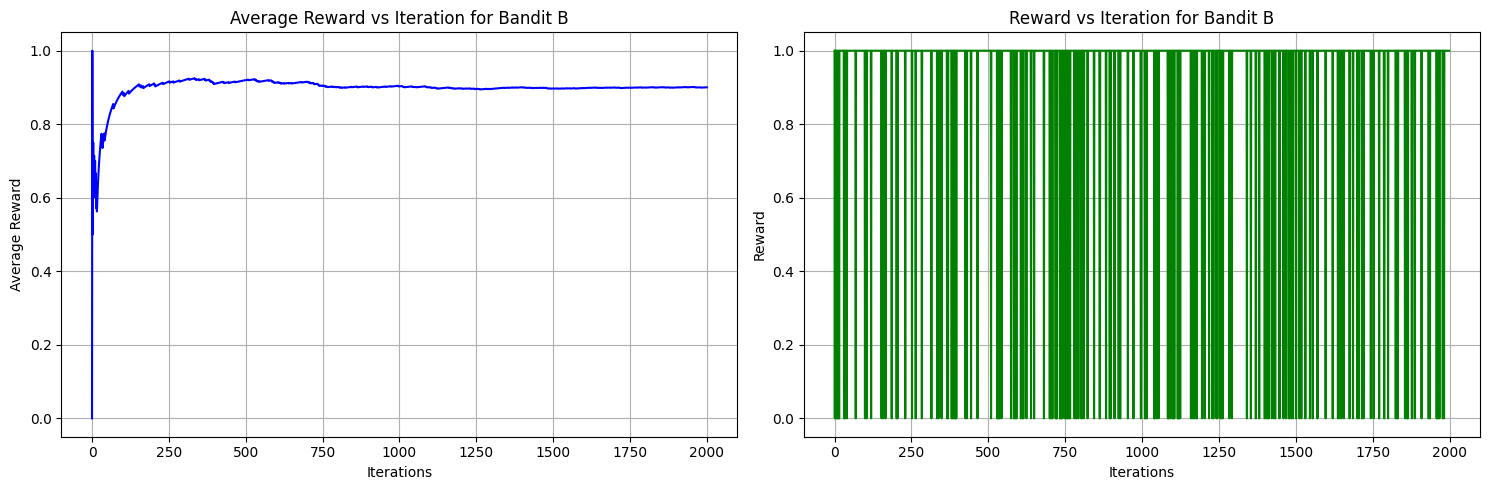

In [7]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg, color='blue')
ax1.title.set_text("Average Reward vs Iteration for Bandit B")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Average Reward")
ax1.grid(True)
ax2.plot(R, color='green')
ax2.title.set_text("Reward vs Iteration for Bandit B")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Reward")
ax2.grid(True)
plt.tight_layout()
plt.show()
